In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
dataset = pd.read_csv('ratings.csv')

In [29]:
dataset.drop('timestamp', axis = 1, inplace = True)

In [30]:
dataset.columns = ['uid', 'iid', 'rating']

In [31]:
dataset.head()

,uid,iid,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [32]:
title = pd.read_csv('movies.csv')

In [33]:
title.columns = ['iid', 'title', 'genres']

In [34]:
title.head()

,iid,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


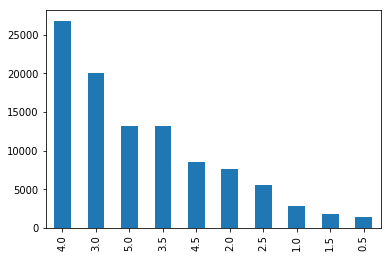

In [35]:
dataset.rating.value_counts().plot(kind='bar')

In [36]:
from surprise import Reader, Dataset

In [37]:
reader = Reader(rating_scale=(0.5, 5))

In [38]:
data = Dataset.load_from_df(dataset, reader)

In [39]:
from surprise.model_selection import train_test_split

In [40]:
trainset, testset = train_test_split(data, test_size=0.25)

In [41]:
from surprise import SVD, accuracy

In [42]:
algo = SVD(lr_all=0.05, reg_all=0.001)
algo.fit(data.build_full_trainset())

In [43]:
predictions = algo.test(testset)

In [44]:
from surprise import accuracy

In [45]:
accuracy.rmse(predictions)

RMSE: 0.1122


0.11224854797741438

In [46]:
accuracy.mae(predictions)

MAE:  0.0620


0.06200221555511664

In [47]:
def user_watch(uid):
    return pd.merge(dataset[dataset['uid'] == uid], title, on = 'iid').sort_values('rating', ascending = False).head(20)

In [52]:
user_watch(30)

,uid,iid,rating,title,genres
0,30,110,5.0,Braveheart (1995),Action|Drama|War
16,30,58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
31,30,115617,5.0,Big Hero 6 (2014),Action|Animation|Comedy
30,30,112852,5.0,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi
29,30,111759,5.0,Edge of Tomorrow (2014),Action|Sci-Fi|IMAX
28,30,109487,5.0,Interstellar (2014),Sci-Fi|IMAX
25,30,96821,5.0,"Perks of Being a Wallflower, The (2012)",Drama|Romance
24,30,95510,5.0,"Amazing Spider-Man, The (2012)",Action|Adventure|Sci-Fi|IMAX
23,30,93510,5.0,21 Jump Street (2012),Action|Comedy|Crime
22,30,91529,5.0,"Dark Knight Rises, The (2012)",Action|Adventure|Crime|IMAX


In [49]:
iids = dataset['uid'].unique()    

In [50]:
def final_predict(uid):
    iids_uid = dataset[dataset['uid'] == uid]['iid'].unique()
    iids_to_pred = np.setdiff1d(iids, iids_uid)
    testset = [[40, iid, 4.0] for iid in iids_to_pred]
    predict = algo.test(testset)
    df = pd.DataFrame(predict).drop('details', axis = 1).sort_values('est', ascending = False).head(15)
    return pd.merge(df, title, on = 'iid')

In [51]:
final_predict(40)

,uid,iid,r_ui,est,title,genres
0,40,608,4.0,5.000000,Fargo (1996),Comedy|Crime|Drama|Thriller
1,40,36,4.0,5.000000,Dead Man Walking (1995),Crime|Drama
2,40,527,4.0,5.000000,Schindler's List (1993),Drama|War
3,40,377,4.0,5.000000,Speed (1994),Action|Romance|Thriller
4,40,246,4.0,5.000000,Hoop Dreams (1994),Documentary
5,40,555,4.0,5.000000,True Romance (1993),Crime|Thriller
6,40,185,4.0,4.856519,"Net, The (1995)",Action|Crime|Thriller
7,40,11,4.0,4.855644,"American President, The (1995)",Comedy|Drama|Romance
8,40,593,4.0,4.847712,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
9,40,497,4.0,4.723933,Much Ado About Nothing (1993),Comedy|Romance


In [1]:
# from wtforms import (Form, TextField, validators, SubmitField, 
# DecimalField, IntegerField)

In [2]:
# class ReusableForm(Form):
#     """User entry form for entering specifics for generation"""
#     # Starting seed
#     seed = TextField("Enter a seed string or 'random':", validators=[
#                      validators.InputRequired()])
#     # Diversity of predictions
#     diversity = DecimalField('Enter diversity:', default=0.8,
#                              validators=[validators.InputRequired(),
#                                          validators.NumberRange(min=0.5, max=5.0,
#                                          message='Diversity must be between 0.5 and 5.')])
#     # Number of words
#     words = IntegerField('Enter number of words to generate:',
#                          default=50, validators=[validators.InputRequired(),
#                                                  validators.NumberRange(min=10, max=100, 
#                                                  message='Number of words must be between 10 and 100')])
#     # Submit button
#     submit = SubmitField("Enter")
    

In [3]:
# from flask import Flask, escape, request, render_template
# app = Flask(__name__)

In [4]:
# @app.route("/", methods=['GET', 'POST'])
# def home():
#     """Home page of app with form"""
#     # Create form
#     form = ReusableForm(request.form)
    
#     # On form entry and all conditions met
#     if request.method == 'POST' and form.validate():
#         # Extract information
#         seed = request.form['seed']
#         diversity = float(request.form['diversity'])
#         words = int(request.form['words'])
#         # Generate a random sequence
#         if seed == 'random':
#             return render_template('random.html', 
#                                    input=generate_random_start(model=model, 
#                                                                graph=graph, 
#                                                                new_words=words, 
#                                                                diversity=diversity))
#         # Generate starting from a seed sequence
#         else:
#             return render_template('seeded.html', 
#                                    input=generate_from_seed(model=model, 
#                                                             graph=graph, 
#                                                             seed=seed, 
#                                                             new_words=words, 
#                                                             diversity=diversity))

#     # Send template information to index.html
#     return render_template('index.html', form=form)

In [ ]:
# @app.route('/')
# def hello():
#     name = request.args.get("name", "World")
#     return f'Hello, {escape(name)}!'

In [5]:
# app.run(host='127.0.0.1', port=50000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:50000/ (Press CTRL+C to quit)
[2019-09-20 15:43:08,902] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2292, in wsgi_app
    response = self.full_dispatch_request()
  File "/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1815, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1718, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 35, in reraise
    raise value
  File "/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1813, in full_dispatch_request
    rv = self.dispatch_request()
  File "/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1799, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<ipython-input-4-c25173d0df0b>", line 30, in 